In [1]:
import pandas as pd
%matplotlib inline

from pathlib import Path
data_path = Path('../data/data.csv')

In [2]:
proact_raw = pd.read_csv(data_path)
proact_raw.describe()

,ID,Age,Onset.time,Onset.Bulbar,Onset.Limb,Sex.Male,time,Next.FRS,Next.visit.Time,ALSFRS_Total,...,Bilirubin,Chloride,Hematocrit,Hemoglobin,Potassium,Protein,Glucose,Calcium,Sodium,Platelets
count,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,...,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000
mean,501834.093259,54.652678,-726.958079,0.565304,-0.592648,0.266332,186.661279,165.990086,186.197927,26.844085,...,11.500121,102.811024,38.681452,144.871314,4.193322,72.425108,5.620534,2.332697,140.169048,242.511522
std,289211.103048,11.751766,481.111851,0.824901,0.805480,0.963903,154.719267,341.057911,333.491912,7.283408,...,6.077683,3.672409,13.627651,12.671118,0.341282,4.702865,1.602771,0.115433,2.790542,62.093461
min,329.000000,20.000000,-8741.000000,-1.000000,-1.000000,-1.000000,-12.000000,0.000000,2.000000,0.000000,...,0.000000,65.000000,0.287000,6.204000,2.700000,40.000000,0.000000,0.586325,119.000000,4.000000
25%,251579.000000,46.000000,-963.000000,1.000000,-1.000000,-1.000000,61.000000,23.000000,32.000000,22.000000,...,7.000000,101.000000,39.600000,137.000000,4.000000,70.000000,4.800000,2.245500,138.000000,201.000000
50%,501995.000000,56.000000,-597.000000,1.000000,-1.000000,1.000000,143.000000,29.000000,56.000000,28.000000,...,10.262400,103.000000,42.900000,145.000000,4.100000,72.000000,5.300000,2.320350,140.000000,236.000000
75%,750148.000000,64.000000,-378.000000,1.000000,-1.000000,1.000000,288.000000,35.000000,67.000000,32.000000,...,15.393600,105.000000,45.400000,153.000000,4.400000,75.000000,5.900000,2.400000,142.000000,276.000000
max,999880.000000,84.000000,0.000000,1.000000,1.000000,1.000000,623.000000,999.000000,999.000000,40.000000,...,153.936000,118.000000,81.000000,280.000000,13.000000,96.000000,28.000000,2.950000,176.000000,866.000000


In [3]:
# keep only those time >= 0
negative_time_ids = proact_raw.loc[proact_raw['time'] < 0]['ID'].values
proact_filterd = proact_raw.loc[~proact_raw.ID.isin(negative_time_ids),].copy()
proact_filterd = proact_raw.copy()

In [4]:
from sklearn.preprocessing import RobustScaler
scl = RobustScaler()
cols = ['FVC', 'CK', 'Creatinine', 'Phosphorus',
       'Alkaline.Phosphatase', 'Albumin', 'Bilirubin', 'Chloride',
       'Hematocrit', 'Hemoglobin', 'Potassium', 'Protein', 'Glucose',
       'Calcium', 'Sodium', 'Platelets']
proact_filterd.loc[:, cols] = scl.fit_transform(proact_filterd.loc[:, cols])

<AxesSubplot:>

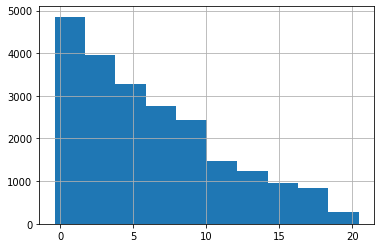

In [5]:
proact_filterd['time_months'] = (proact_filterd['time']/365.24) *12  # https://nctu.partners.org/ProACT/Document/DisplayLatest/3
proact_filterd['time_months'].hist()

<AxesSubplot:>

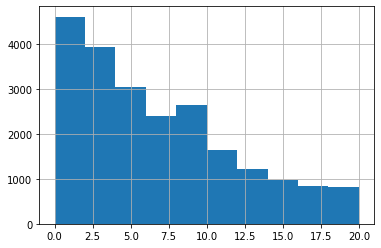

In [6]:
proact_filterd['time_months_round'] = proact_filterd['time_months'].round()
proact_filterd['time_months_round'].hist()

In [7]:
proact_filterd.set_index('ID', inplace=True)
proact_filterd.sort_values(['ID','time'], inplace=True)
proact_filterd.head(10)


,Age,Onset.time,Onset.Bulbar,Onset.Limb,Sex.Male,time,Next.FRS,Next.visit.Time,ALSFRS_Total,Q1_Speech,...,Hematocrit,Hemoglobin,Potassium,Protein,Glucose,Calcium,Sodium,Platelets,time_months,time_months_round
ID,,,,,,,,,,,,,,,,,,,,,
329,38,-1706,1,-1,-1,0,30,42,27,4,...,-0.327586,-0.9375,-0.25,-0.4,-0.327727,-0.484466,-0.50,0.493333,0.000000,0.0
329,38,-1706,1,-1,-1,42,30,30,30,4,...,-0.844828,-1.5625,-0.25,-0.4,0.580455,-0.484466,-0.75,0.040000,1.379915,1.0
329,38,-1706,1,-1,-1,72,27,63,30,4,...,-0.844828,-1.5625,-2.75,-0.4,0.227273,-0.484466,0.25,-1.000000,2.365568,2.0
329,38,-1706,1,-1,-1,135,25,54,27,4,...,-0.844828,-1.5625,-0.25,-0.4,-0.075455,-0.484466,-0.50,-2.733333,4.435440,4.0
329,38,-1706,1,-1,-1,189,26,58,25,4,...,-1.189655,-1.5625,-0.25,-0.4,-0.277273,-0.484466,0.50,1.120000,6.209616,6.0
329,38,-1706,1,-1,-1,247,25,27,26,4,...,-0.844828,-1.5625,-0.25,-0.4,0.277727,-0.484466,-0.75,1.480000,8.115212,8.0
329,38,-1706,1,-1,-1,274,999,999,25,4,...,-1.362069,-1.5625,-0.25,1.6,1.438182,1.130421,0.00,0.760000,9.002300,9.0
533,65,-1023,-1,1,-1,0,999,999,30,1,...,-0.379310,-0.1250,1.00,-0.4,1.942727,-0.645955,0.75,-0.893333,0.000000,0.0
649,48,-341,-1,1,-1,0,35,32,36,3,...,-0.534483,-0.8125,0.25,0.2,-0.428636,-0.968932,0.00,0.386667,0.000000,0.0


In [8]:
FRS_cols = proact_filterd.columns[proact_filterd.columns.to_series().str.startswith('Q')].to_list()
_id = -88888888

rows = []

cols = ['FVC', 'CK', 'Creatinine', 'Phosphorus',
       'Alkaline.Phosphatase', 'Albumin', 'Bilirubin', 'Chloride',
       'Hematocrit', 'Hemoglobin', 'Potassium', 'Protein', 'Glucose',
       'Calcium', 'Sodium', 'Platelets']

def adder(index, row, FRS_diag):
        temp_dict = {}
        temp_dict['ID'] = index
        temp_dict['time'] = int(row['time'])
        temp_dict['Age'] = int(row['Age'])
        temp_dict['FRS_diag'] = FRS_diag
        temp_dict['ALSFRS_Total'] = int(row['ALSFRS_Total'])
        temp_dict['time_months'] = float(row['time_months'])
        for col in cols:
            temp_dict[col] = row[col]
        rows.append(temp_dict)


for index, row in proact_filterd.iterrows(): # go over each row
    if index != _id:
        adder(index, row, 'CLS')
        _id = index
    for frs_col in FRS_cols:
        adder(index, row, f'{frs_col}_score_{int(row[frs_col])}')
    adder(index, row, 'SEP')

In [9]:
melted = pd.DataFrame(rows)
melted = melted.sort_values(['ID', 'time'])
melted['rank'] = melted.groupby('ID')['time'].rank(method='dense').astype('int8')
melted['rank'] = melted['rank'] - 1
melted.loc[melted['rank'] > 0]

,ID,time,Age,FRS_diag,ALSFRS_Total,time_months,FVC,CK,Creatinine,Phosphorus,...,Chloride,Hematocrit,Hemoglobin,Potassium,Protein,Glucose,Calcium,Sodium,Platelets,rank
12,329,42,38,Q1_Speech_score_4,30,1.379915,0.705882,-0.410853,0.500566,0.333333,...,0.25,-0.844828,-1.5625,-0.25,-0.4,0.580455,-0.484466,-0.75,0.040000,1
13,329,42,38,Q2_Salivation_score_3,30,1.379915,0.705882,-0.410853,0.500566,0.333333,...,0.25,-0.844828,-1.5625,-0.25,-0.4,0.580455,-0.484466,-0.75,0.040000,1
14,329,42,38,Q3_Swallowing_score_4,30,1.379915,0.705882,-0.410853,0.500566,0.333333,...,0.25,-0.844828,-1.5625,-0.25,-0.4,0.580455,-0.484466,-0.75,0.040000,1
15,329,42,38,Q4_Handwriting_score_3,30,1.379915,0.705882,-0.410853,0.500566,0.333333,...,0.25,-0.844828,-1.5625,-0.25,-0.4,0.580455,-0.484466,-0.75,0.040000,1
16,329,42,38,Q5_Cutting_score_3,30,1.379915,0.705882,-0.410853,0.500566,0.333333,...,0.25,-0.844828,-1.5625,-0.25,-0.4,0.580455,-0.484466,-0.75,0.040000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246145,999880,238,51,Q7_Turning_in_Bed_score_3,26,7.819516,-0.735294,0.643411,0.500566,-1.333333,...,-0.25,0.879310,0.9375,-0.25,-0.4,-1.235909,-0.484466,1.00,-0.666667,5
246146,999880,238,51,Q8_Walking_score_2,26,7.819516,-0.735294,0.643411,0.500566,-1.333333,...,-0.25,0.879310,0.9375,-0.25,-0.4,-1.235909,-0.484466,1.00,-0.666667,5
246147,999880,238,51,Q9_Climbing_Stairs_score_0,26,7.819516,-0.735294,0.643411,0.500566,-1.333333,...,-0.25,0.879310,0.9375,-0.25,-0.4,-1.235909,-0.484466,1.00,-0.666667,5
246148,999880,238,51,Q10_Respiratory_score_4,26,7.819516,-0.735294,0.643411,0.500566,-1.333333,...,-0.25,0.879310,0.9375,-0.25,-0.4,-1.235909,-0.484466,1.00,-0.666667,5


In [10]:
# set age to string
melted['age'] = melted['Age'].astype(str)

In [11]:
less_than_3 = melted['ID'].value_counts().index.sort_values()[melted.groupby('ID').max()['time_months'] <= 3]
more_than_3 = melted['ID'].value_counts().index.sort_values()[melted.groupby('ID').max()['time_months'] > 3]
less_than_3_df = melted.loc[melted['ID'].isin(less_than_3)]
more_than_3_df = melted.loc[melted['ID'].isin(more_than_3)]

In [26]:
def get_months(days):
      return (days/365.24) *12

def get_days(months):
    return (months / 12) * 365.24


def save_melted(inner_melted):
    not_inner_melted_rank = inner_melted.groupby(['ID'])['rank'].apply(list).to_frame()
    not_inner_melted_diag = inner_melted.groupby(['ID'])['FRS_diag'].apply(list).to_frame()
    not_inner_melted_age = inner_melted.groupby(['ID'])['age'].apply(list).to_frame()
    not_inner_melted_ALSFRS_Total = inner_melted.groupby(['ID'])['ALSFRS_Total'].apply(list).to_frame()
    not_inner_melted_time_months = inner_melted.groupby(['ID'])['time'].apply(list).to_frame()
    non_inner_melted_lab = [inner_melted.groupby(['ID'])[col].apply(list).to_frame() for col in cols]
    for_behrt = pd.concat([not_inner_melted_diag,not_inner_melted_rank, not_inner_melted_age,not_inner_melted_ALSFRS_Total,not_inner_melted_time_months] + non_inner_melted_lab, axis=1).reset_index()
    for_behrt['fixed_time'] = for_behrt['time'].apply(lambda x : [i - x[0] for i in x])
    for_behrt['fixed_months'] = for_behrt['fixed_time'].apply(lambda x: [get_months(i) for i in x])
    for_behrt.to_parquet(f'../data/for_behrt_wrt_months.parquet')


save_melted(melted)

In [27]:
df = pd.read_parquet(f'../data/for_behrt_wrt_months.parquet')
df

,ID,FRS_diag,rank,age,ALSFRS_Total,time,FVC,CK,Creatinine,Phosphorus,...,Hematocrit,Hemoglobin,Potassium,Protein,Glucose,Calcium,Sodium,Platelets,fixed_time,fixed_months
0,329,"[CLS, Q1_Speech_score_4, Q2_Salivation_score_3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 3...","[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 42, 4...","[0.5294117647058824, 0.5294117647058824, 0.529...","[0.5271317829457365, 0.5271317829457365, 0.527...","[0.5005656108597285, 0.5005656108597285, 0.500...","[0.3333333333333326, 0.3333333333333326, 0.333...",...,"[-0.32758620689655166, -0.32758620689655166, -...","[-0.9375, -0.9375, -0.9375, -0.9375, -0.9375, ...","[-0.2499999999999989, -0.2499999999999989, -0....","[-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0....","[-0.3277272727272726, -0.3277272727272726, -0....","[-0.484466019417476, -0.484466019417476, -0.48...","[-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0....","[0.49333333333333335, 0.49333333333333335, 0.4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 42, 4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,533,"[CLS, Q1_Speech_score_1, Q2_Salivation_score_2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65]","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.029411764705882353, 0.029411764705882353, 0...","[-0.37209302325581395, -0.37209302325581395, -...","[0.25056561085972845, 0.25056561085972845, 0.2...","[-2.0000000000000027, -2.0000000000000027, -2....",...,"[-0.37931034482758563, -0.37931034482758563, -...","[-0.125, -0.125, -0.125, -0.125, -0.125, -0.12...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[-0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0....","[1.9427272727272722, 1.9427272727272722, 1.942...","[-0.6459546925566347, -0.6459546925566347, -0....","[0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.7...","[-0.8933333333333333, -0.8933333333333333, -0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,649,"[CLS, Q1_Speech_score_3, Q2_Salivation_score_3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 4...","[36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 32, 3...","[1.1764705882352942, 1.1764705882352942, 1.176...","[-0.5697674418604651, -0.5697674418604651, -0....","[-0.4994343891402715, -0.4994343891402715, -0....","[-1.3333333333333355, -1.3333333333333355, -1....",...,"[-0.5344827586206902, -0.5344827586206902, -0....","[-0.8125, -0.8125, -0.8125, -0.8125, -0.8125, ...","[0.2500000000000011, 0.2500000000000011, 0.250...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ...","[-0.42863636363636326, -0.42863636363636326, -...","[-0.9689320388349492, -0.9689320388349492, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.38666666666666666, 0.38666666666666666, 0.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 32, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,708,"[CLS, Q1_Speech_score_3, Q2_Salivation_score_3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 4...","[33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 35, 3...","[-0.8235294117647058, -0.8235294117647058, -0....","[-0.5271317829457365, -0.5271317829457365, -0....","[0.5005656108597285, 0.5005656108597285, 0.500...","[-1.3333333333333355, -1.3333333333333355, -1....",...,"[0.01724137931034508, 0.01724137931034508, 0.0...","[0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.312...","[2.249999999999999, 2.249999999999999, 2.24999...","[1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, ...","[-0.3277272727272726, -0.3277272727272726, -0....","[1.1304207119741108, 1.1304207119741108, 1.130...","[1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.2...","[0.013333333333333334, 0.013333333

<AxesSubplot:>

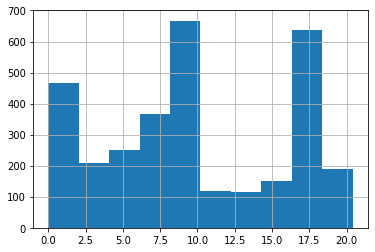

In [28]:
df['fixed_months'].apply(max).hist()

In [40]:
df.loc[df['fixed_time'].apply(max) < get_days(3) - 7].reset_index(drop=True).to_parquet(f'../data/for_behrt_wrt_months_less_than_3_months.parquet')
df.loc[~df['fixed_time'].apply(max) < get_days(3) - 7].reset_index(drop=True).to_parquet(f'../data/for_behrt_wrt_months_more_than_3_months.parquet')

In [84]:
more_than = pd.read_parquet(f'../data/for_behrt_wrt_months_more_than_3_months.parquet')

In [85]:
valid_for_train_ub =  get_days(3) + 7
def get_last_valid_idx(ls):
    s = pd.Series([i <= valid_for_train_ub  for i in ls])
    return s.where(s).last_valid_index()
more_than['3_months_idx'] = more_than['fixed_time'].apply(get_last_valid_idx)
more_than['3_months_idx'].max()

55

In [59]:
int(more_than.shape[0] * .8)

2536

In [60]:
more_than['3_months_idx']


0       33
1       11
2       44
3       33
4       44
        ..
3166    22
3167    11
3168    44
3169    44
3170    33
Name: 3_months_idx, Length: 3171, dtype: int64

In [86]:
more_than['FRS_diag_original'] = more_than['FRS_diag'].copy(deep=True)
more_than['FRS_diag'] = more_than.apply(lambda x: x['FRS_diag'][:x['3_months_idx']+1], axis=1)
more_than.to_parquet(f'../data/for_behrt_wrt_months_more_than_3_months_fixed.parquet')

In [83]:
more_than[['FRS_diag_original', 'FRS_diag']]


,FRS_diag_original,FRS_diag
0,329,329
1,533,533
2,649,649
3,708,708
4,1234,1234
...,...,...
3166,998519,998519
3167,998542,998542
3168,998764,998764
3169,999482,999482


In [72]:
more_than.apply(lambda x:  x['FRS_diag'].shape, axis=1)

0        (78,)
1        (12,)
2       (133,)
3        (67,)
4       (144,)
         ...  
3166     (56,)
3167     (12,)
3168     (56,)
3169    (100,)
3170     (67,)
Length: 3171, dtype: object